In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [2]:
data_17 = pd.read_csv("../data/modis_2017_India.csv")
data_18 = pd.read_csv("../data/modis_2018_India.csv")
data_19 = pd.read_csv("../data/modis_2019_India.csv")
data_20 = pd.read_csv("../data/modis_2020_India.csv")
data_21 = pd.read_csv("../data/modis_2021_India.csv")
data_22 = pd.read_csv("../data/modis_2022_India.csv")

In [3]:
df = pd.concat([data_17, data_18, data_19, data_20, data_21, data_22])

In [4]:
df

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0       31.4814    75.7365       301.5   1.4    1.2  2017-01-01       529   
1       28.7628    79.5194       311.3   1.0    1.0  2017-01-01       530   
2       28.0761    79.8547       304.2   1.0    1.0  2017-01-01       530   
3       28.5888    78.7448       305.0   1.0    1.0  2017-01-01       530   
4       29.4661    77.1339       303.3   1.1    1.1  2017-01-01       530   
...         ...        ...         ...   ...    ...         ...       ...   
81520   29.9033    74.9521       303.3   2.7    1.6  2022-12-31      1726   
81521   29.9086    74.9460       323.9   2.7    1.6  2022-12-31      1726   
81522   29.9170    74.9576       323.5   1.9    1.3  2022-12-31      2127   
81523   21.1048    72.6415       302.9   2.0    1.4  2022-12-31      2130   
81524   21.1137    72.6380       302.7   2.0    1.4  2022-12-31      2130   

      satellite instrument  confidence  version  bright_t31    frp daynight  \
0         Terra      MODIS          48     6.20       291.1    5.4        D   
1         Terra      MODIS          71     6.20       292.8    8.6        D   
2         Terra      MODIS          58     6.20       290.6    5.0        D   
3         Terra      MODIS          60     6.20       293.5    4.3        D   
4         Terra      MODIS          56     6.20       291.6    5.6        D   
...         ...        ...         ...      ...         ...    ...      ...   
81520     Terra      MODIS          55     6.03       281.3   37.2        N   
81521     Terra      MODIS         100     6.03       282.0  106.5        N   
81522      Aqua      MODIS         100     6.03       274.6   66.9        N   
81523      Aqua      MODIS          52     6.03       289.9   18.5        N   
81524      Aqua      MODIS          51     6.03       290.1   18.3        N   

       type  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
81520     0  
81521     0  
81522     0  
81523     2  
81524     2  

[517970 rows x 15 columns]

In [5]:
df['type'].value_counts()

type
0    490993
2     26853
3       120
1         4
Name: count, dtype: int64

In [8]:
df = df.query('type!=1 and type!=3')

In [10]:
df['type'].value_counts()   

type
0    490993
2     26853
Name: count, dtype: int64

In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
df.loc[df['type']==2, 'type'] = 1

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517846 entries, 0 to 517845
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    517846 non-null  float64
 1   longitude   517846 non-null  float64
 2   brightness  517846 non-null  float64
 3   scan        517846 non-null  float64
 4   track       517846 non-null  float64
 5   acq_date    517846 non-null  object 
 6   acq_time    517846 non-null  int64  
 7   satellite   517846 non-null  object 
 8   instrument  517846 non-null  object 
 9   confidence  517846 non-null  int64  
 10  version     517846 non-null  float64
 11  bright_t31  517846 non-null  float64
 12  frp         517846 non-null  float64
 13  daynight    517846 non-null  object 
 14  type        517846 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 59.3+ MB


In [15]:
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [16]:
df.describe()

latitude      longitude     brightness           scan  \
count  517846.000000  517846.000000  517846.000000  517846.000000   
mean       24.315065      81.014791     324.271993       1.417904   
std         4.928434       6.475605      14.374111       0.638030   
min         8.107200      68.563700     300.000000       1.000000   
25%        21.132800      75.760700     314.700000       1.000000   
50%        24.062900      79.029500     322.600000       1.200000   
75%        29.397600      84.104300     331.700000       1.500000   
max        34.973400      97.103300     505.700000       4.800000   

               track       acq_time     confidence        version  \
count  517846.000000  517846.000000  517846.000000  517846.000000   
mean        1.150830     823.377937      64.326294       6.057088   
std         0.203496     353.377152      18.257263       0.062219   
min         1.000000     325.000000       0.000000       6.030000   
25%         1.000000     644.000000      54.000000       6.030000   
50%         1.100000     753.000000      66.000000       6.030000   
75%         1.200000     820.000000      76.000000       6.030000   
max         2.000000    2151.000000     100.000000       6.200000   

          bright_t31            frp           type  
count  517846.000000  517846.000000  517846.000000  
mean      303.786265      27.456132       0.051855  
std         8.617445      73.275357       0.221735  
min       266.800000       0.000000       0.000000  
25%       298.200000       8.800000       0.000000  
50%       302.400000      13.800000       0.000000  
75%       309.900000      24.900000       0.000000  
max       400.100000    6961.800000       1.000000

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

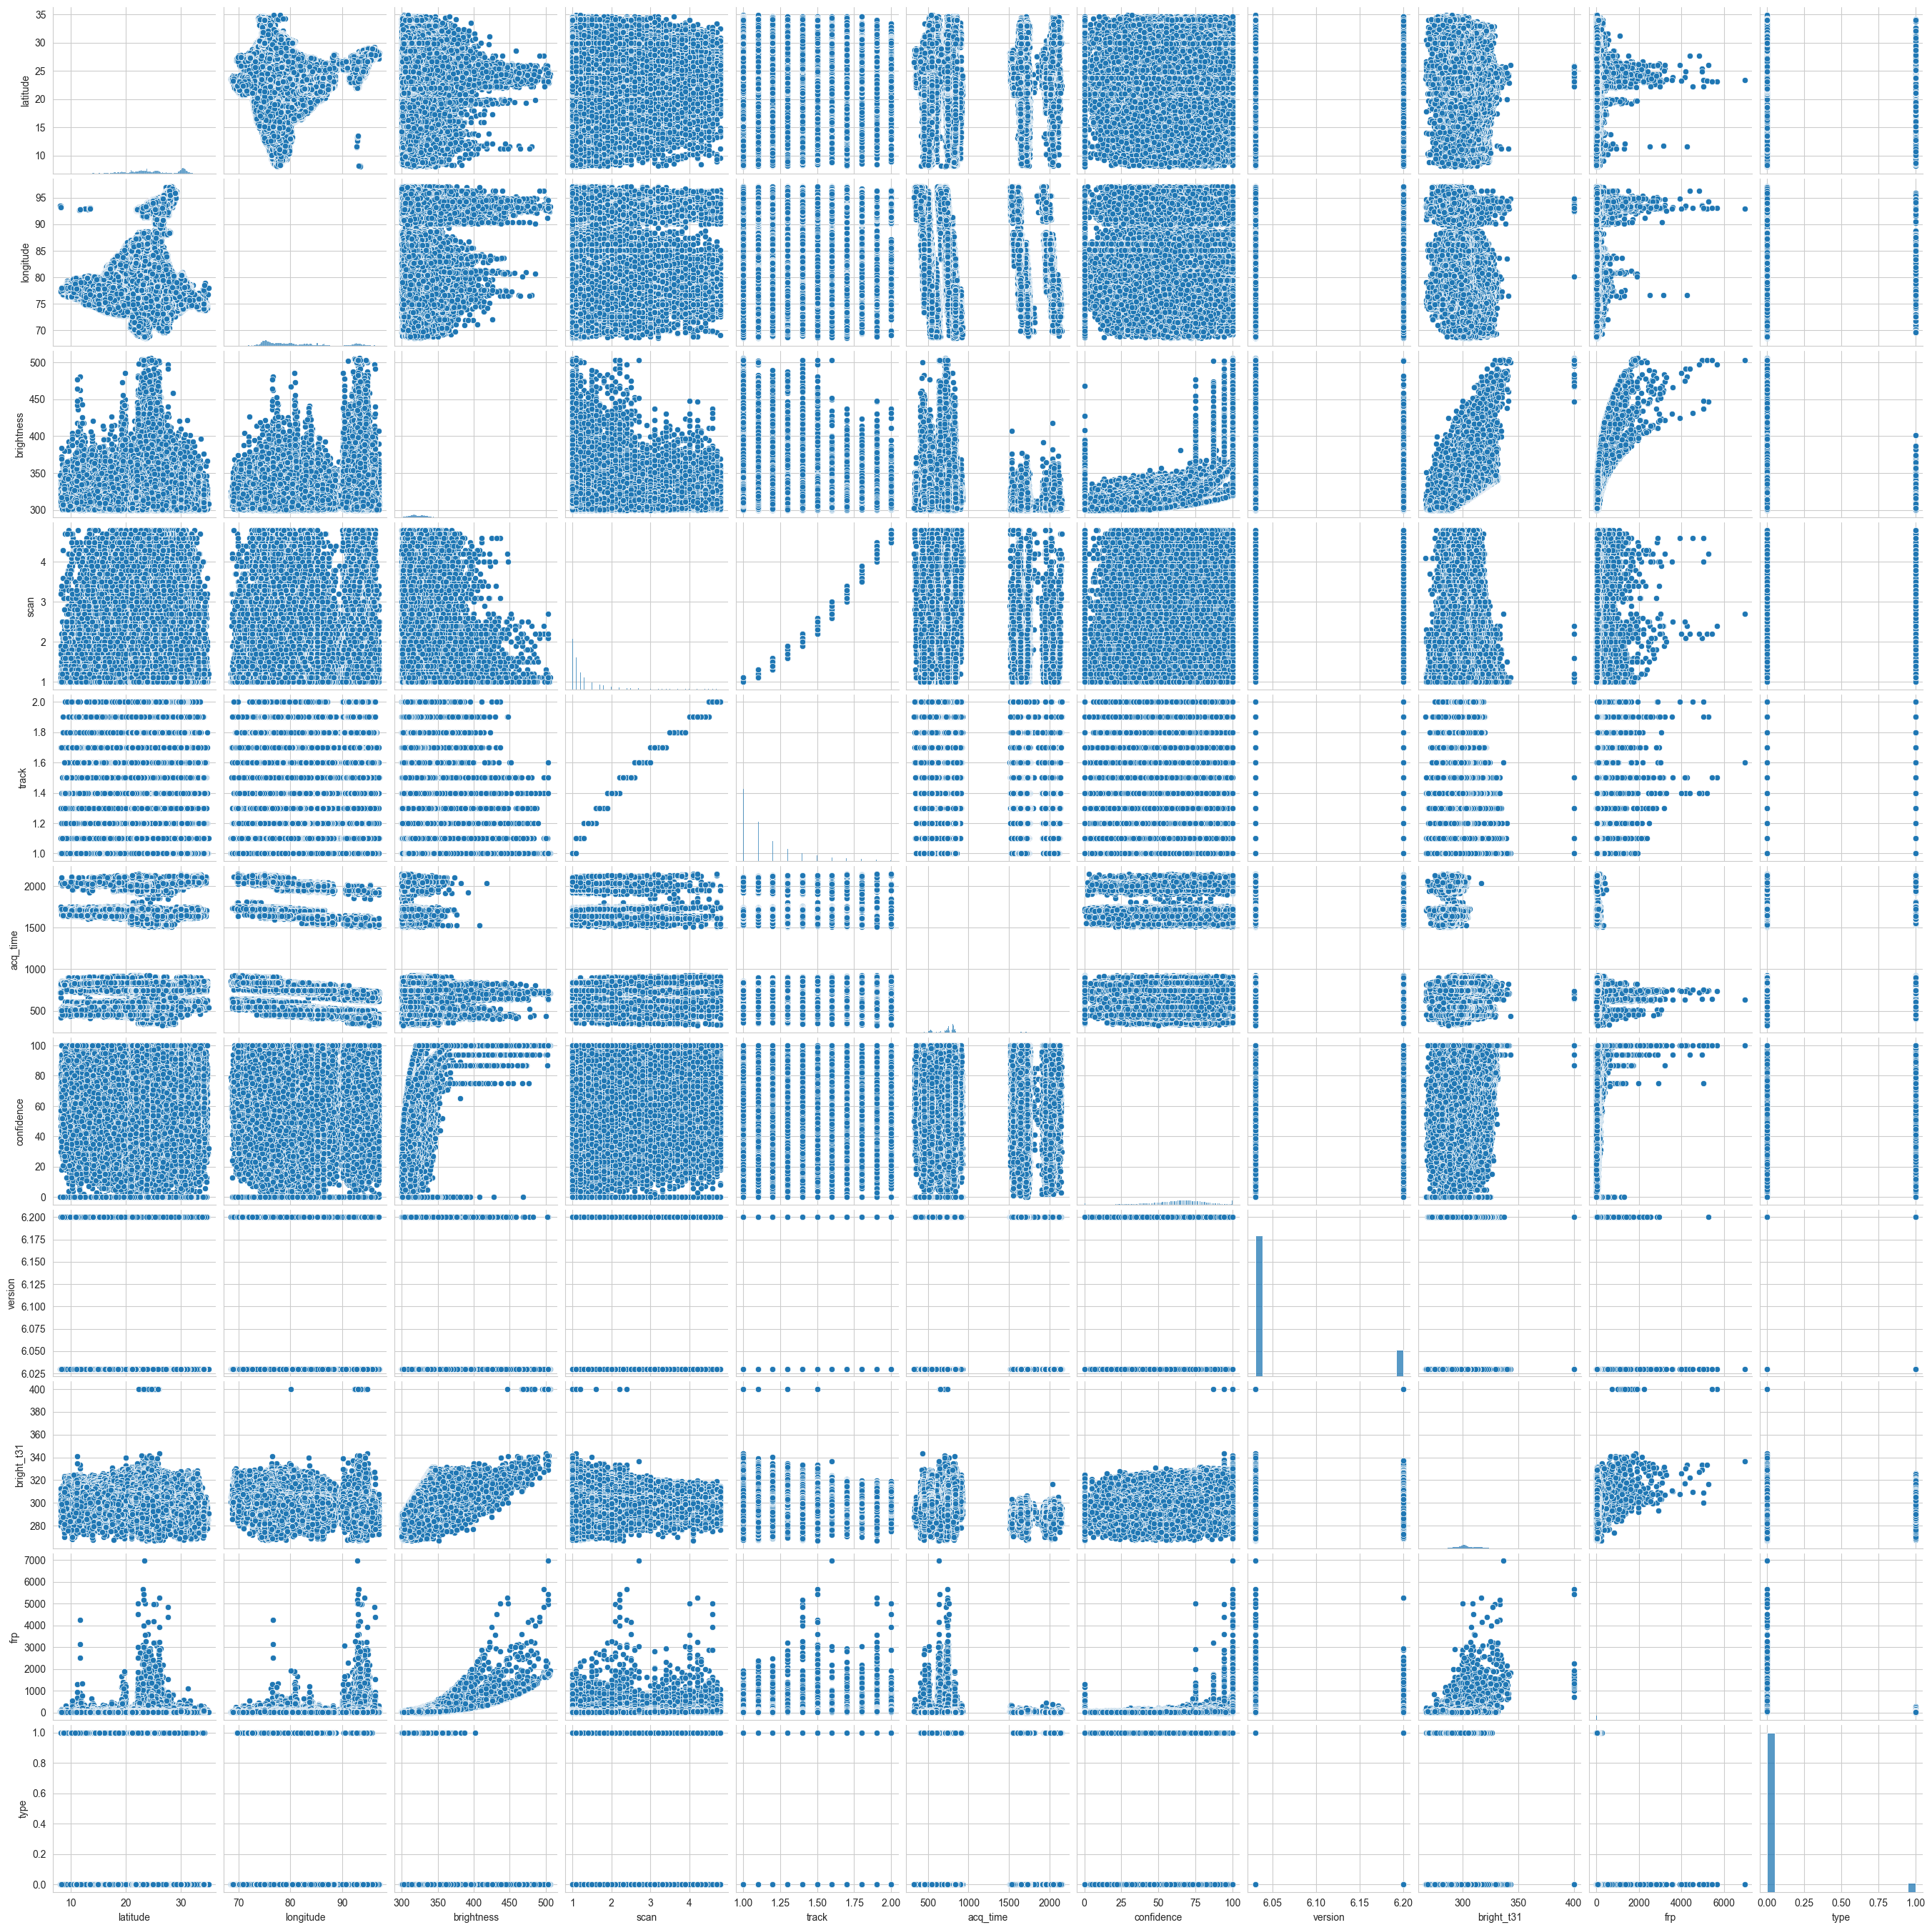

In [18]:
sns.pairplot(df)
plt.show()

<Axes: xlabel='daynight', ylabel='confidence'>

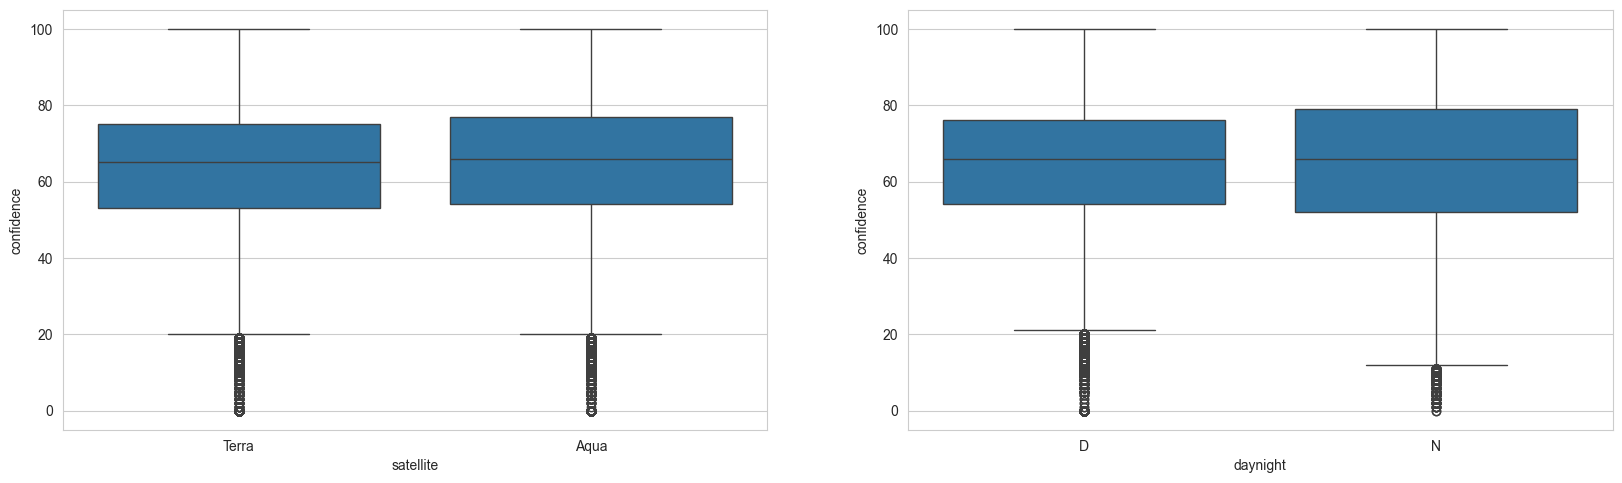

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'satellite', y = 'confidence', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'daynight', y = 'confidence', data = df)

<Axes: >

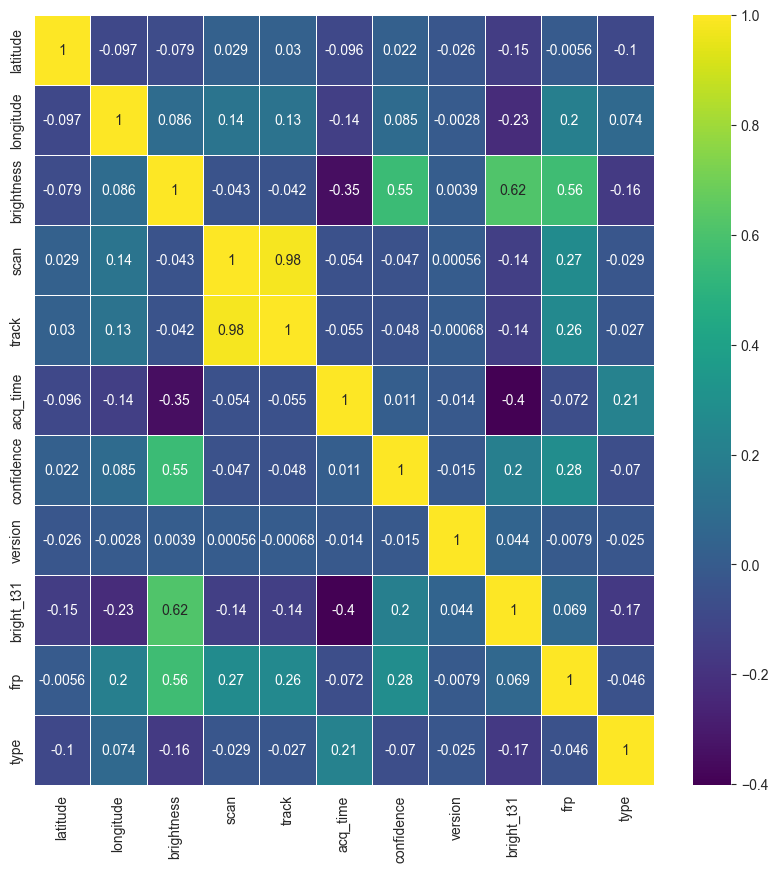

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis',linewidths=.5)

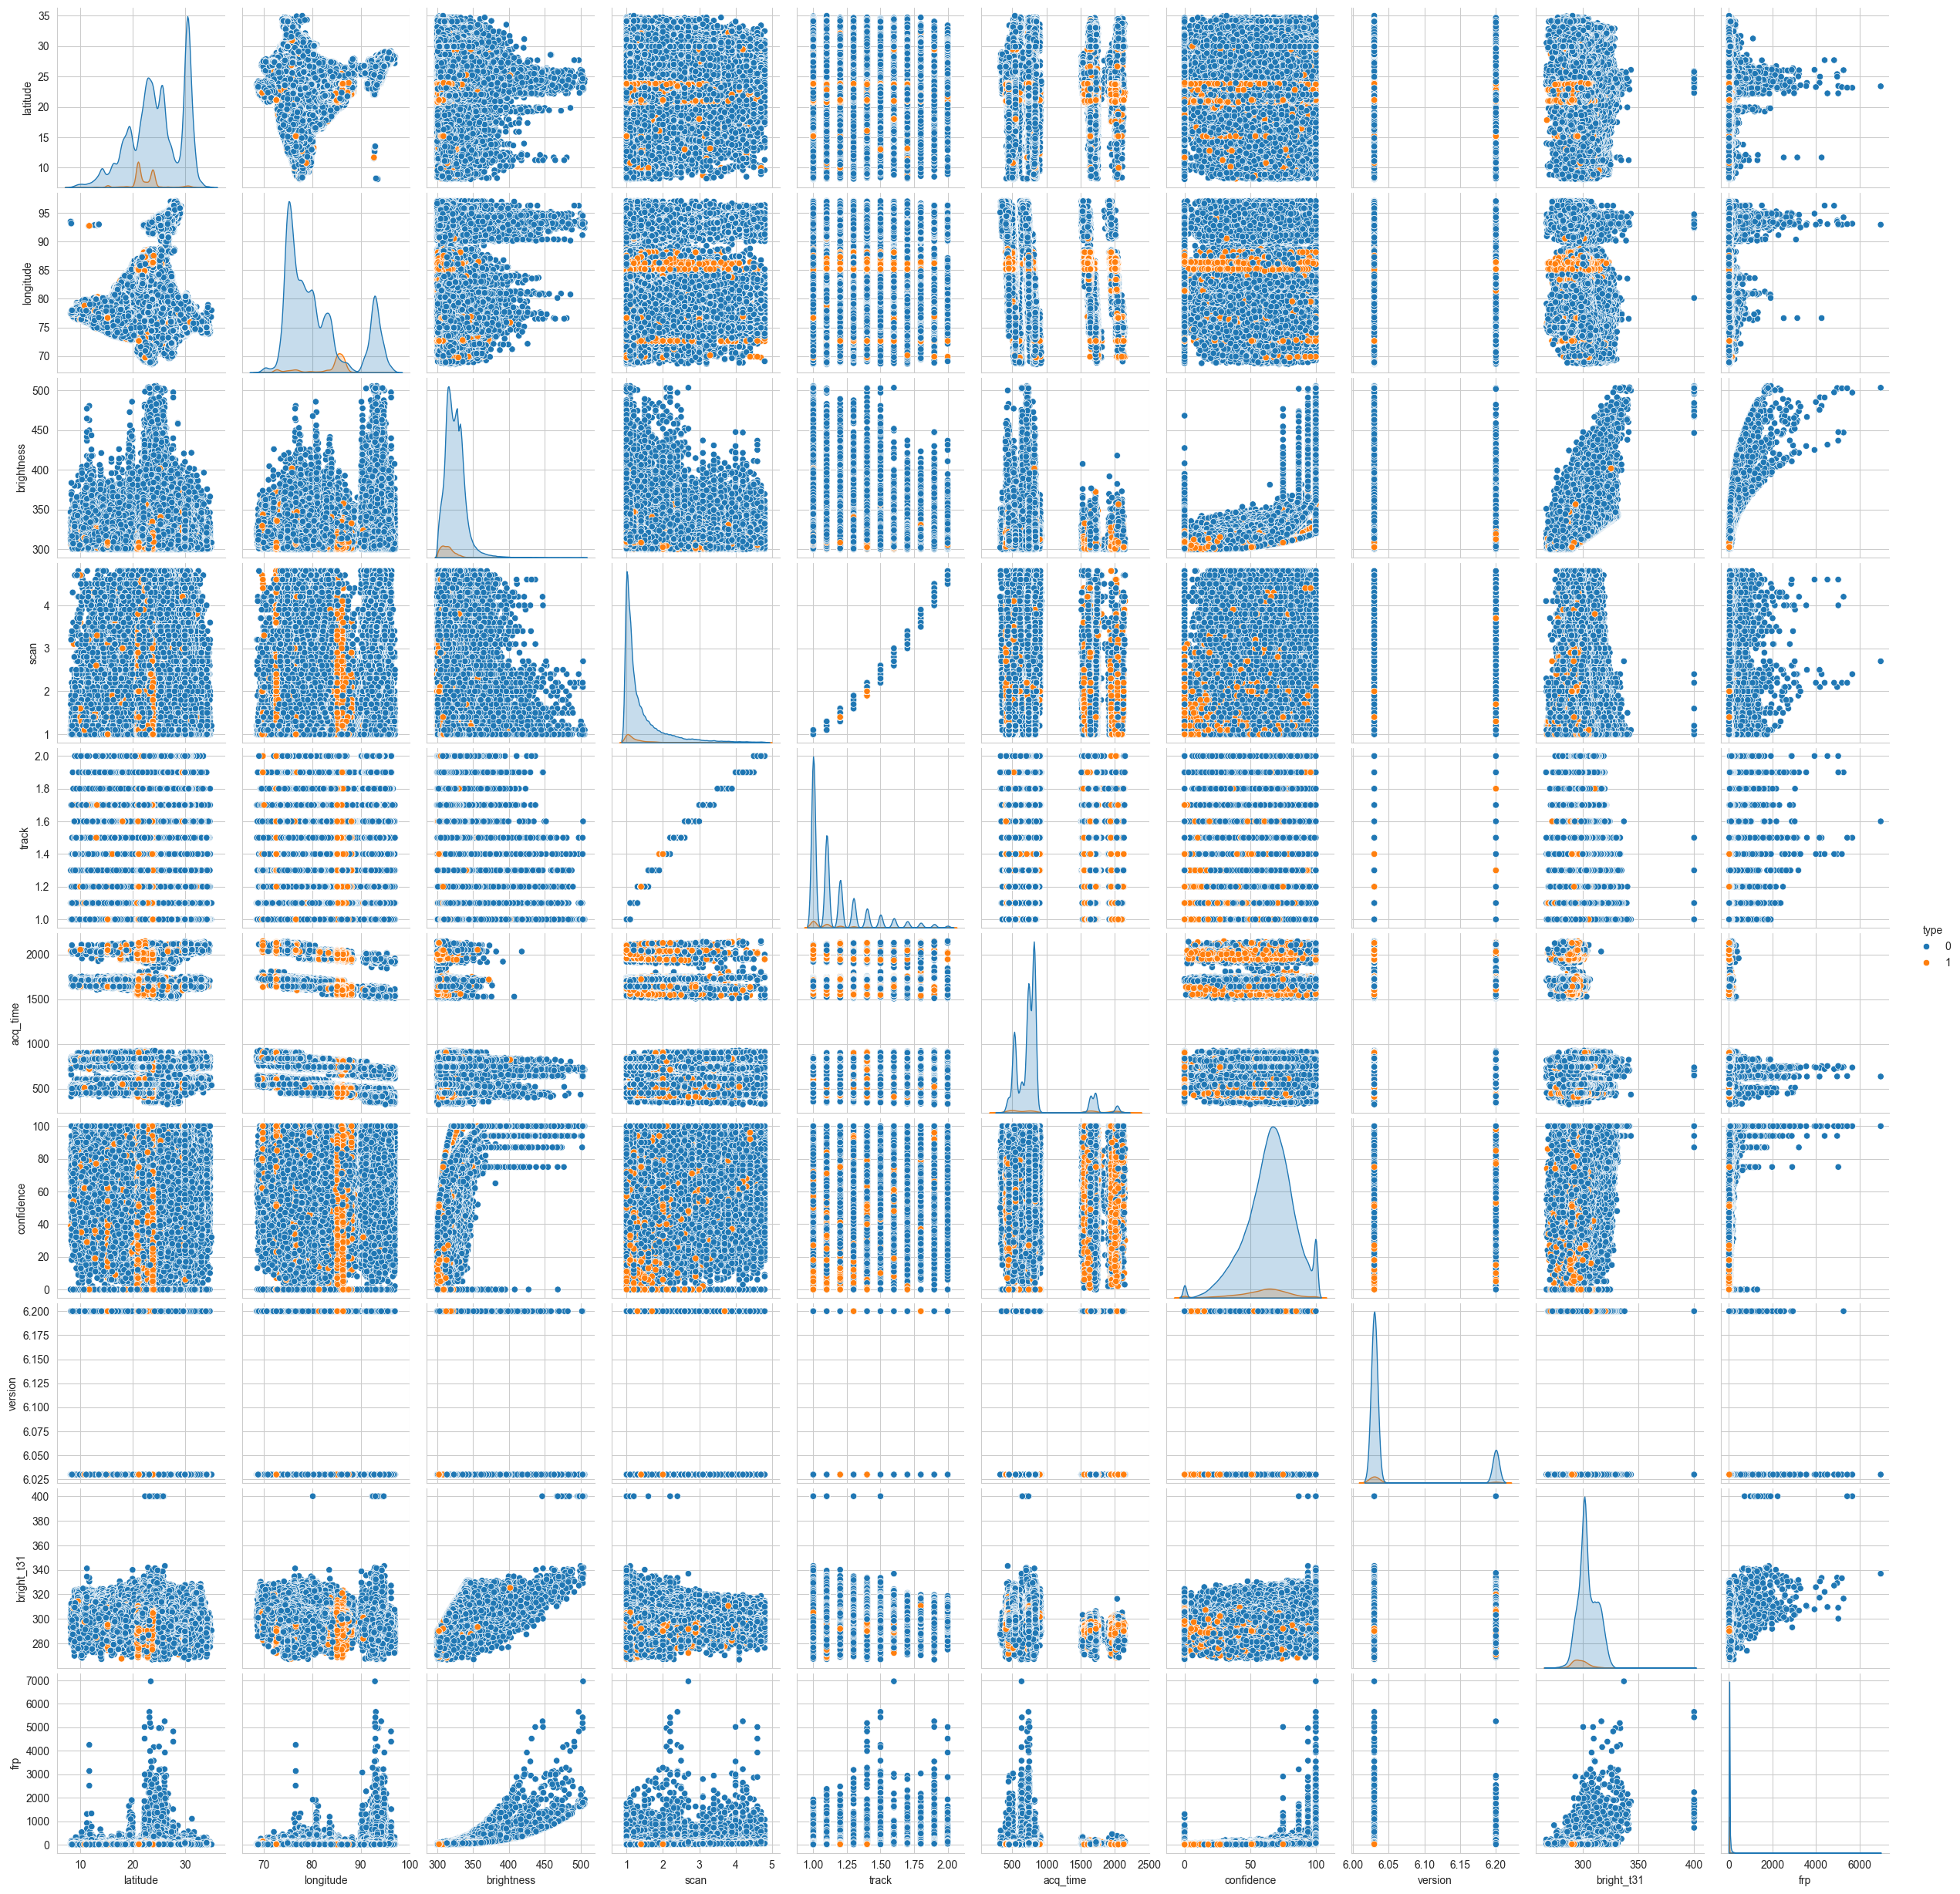

In [23]:
sns.pairplot(df,hue='type')
plt.show()

<Axes: xlabel='acq_date', ylabel='frp'>

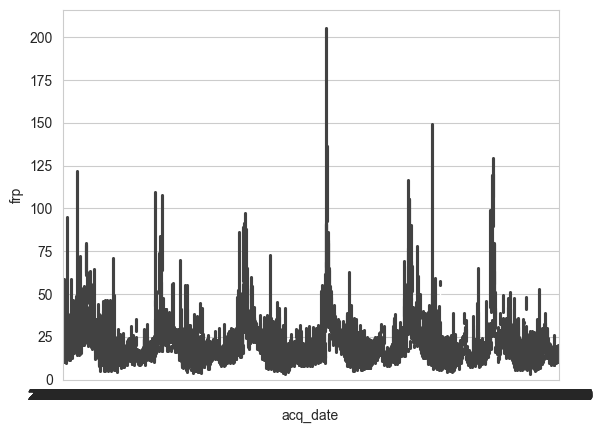

In [24]:
sns.barplot(x='acq_date',y='frp',data=df)

In [25]:
df = df.drop(['track'], axis = 1)

df = df.drop(['instrument', 'version'], axis = 1)
df['satellite'] = df['satellite'].map({'Terra':0,'Aqua':1})
df['daynight'] = df['daynight'].map({'D':0,'N':1})
df['month'] = df['acq_date'].apply(lambda x:int(x.split('-')[1]))
df = df.sample(frac=0.2)
df = df.reset_index().drop("index", axis=1)
df.head()

latitude  longitude  brightness  scan    acq_date  acq_time  satellite  \
0   24.4007    81.1843       315.8   1.4  2021-11-22       739          1   
1   25.4889    78.6474       318.9   1.5  2017-11-12       822          1   
2   30.4762    75.5254       321.5   1.0  2021-11-09       812          1   
3   22.5757    76.3822       337.3   1.2  2018-03-30       550          0   
4   22.5055    86.9327       321.9   2.7  2021-03-01       702          1   

   confidence  bright_t31   frp  daynight  type  month  
0          55       300.4   9.9         0     0     11  
1          61       303.6  12.4         0     0     11  
2          50       304.1   9.5         0     0     11  
3          50       321.4  20.2         0     0      3  
4          57       307.6  31.4         0     0      3

<Axes: >

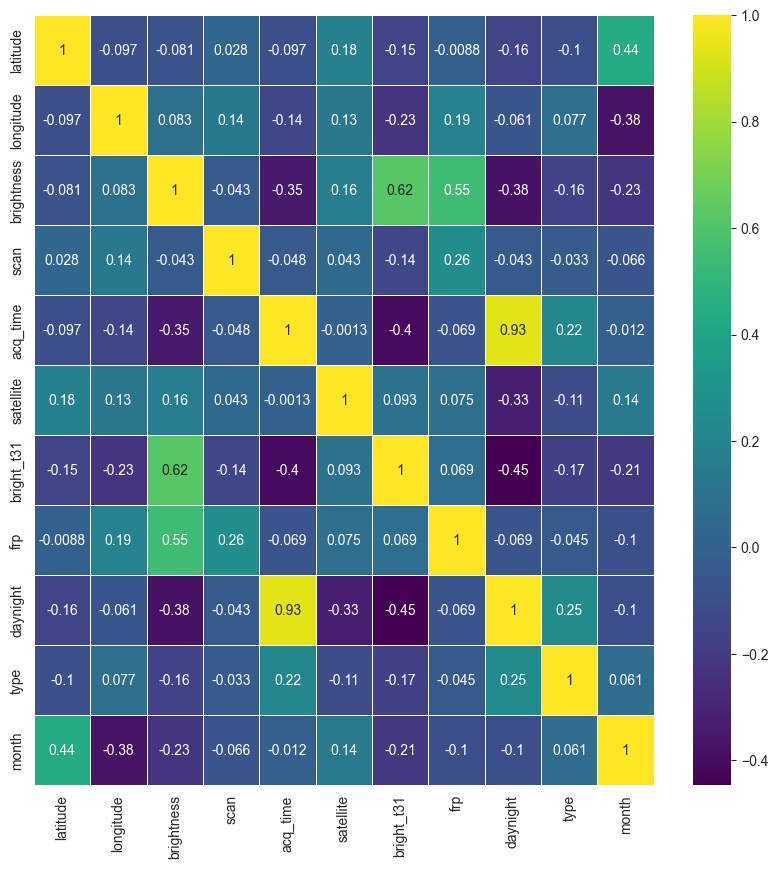

In [26]:
y = df['confidence']
firedf = df.drop(['confidence', 'acq_date'], axis = 1)
plt.figure(figsize=(10, 10))
sns.heatmap(firedf.corr(),annot=True,cmap='viridis',linewidths=.5)

In [27]:
X = df[['latitude','l|ongitude','month','brightness','scan','acq_time','bright_t31','daynight']]
y = df['frp']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [28]:
df.shape

(103569, 13)

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
model1 = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.1, max_depth = 10, random_state = 0, loss = 'squared_error')
model1.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, random_state=0)

In [31]:
y_pred = model1.predict(X_test)

In [33]:
print("Mean Absolute Error: ", mae(y_test, y_pred))

Mean Absolute Error:  2.5791437249485756


In [35]:
X_train.columns

Index(['latitude', 'longitude', 'month', 'brightness', 'scan', 'acq_time',
       'bright_t31', 'daynight'],
      dtype='object')

In [41]:
import pickle
pickle.dump(model1, open('GradientBoostingRegressor1.pkl', 'wb'))

In [34]:
model1.score(X_test, y_test)

0.9283895776239124

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [5, 10, 15]
}

# Create a GradientBoostingRegressor object
gbr = GradientBoostingRegressor(random_state=0, loss='ls')

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print(f"Best parameters: {best_params}")

# Train the model using the best parameters
model1 = GradientBoostingRegressor(n_estimators=best_params['n_estimators'], 
                                   learning_rate=best_params['learning_rate'], 
                                   max_depth=best_params['max_depth'], 
                                   random_state=0, 
                                   loss='ls')
model1.fit(X_train, y_train)